# PyShop Session 2
## Exercises
***

Given the complexity of the course on NumPy/SciPy, I encourage you to spend most of your homework time trying to under stand what we did in class.  Once you are done there, here are some exercises.

As an example we'll consider a deterministic economy.  This will keep the functions you must write simple and concise, as well as ensure convergence.  However, it will make the solution quite boring.

The questions are in increasing difficulty, where the first question should take you less than a minute and the last one you might not be able to figure out.  Good luck!

**Note:** I appologize for the solutions and questions not being next to each other, but there is a numbering issue in the Markdown that generates this text.  Sorry, but it is a known bug that has yet to be fixed!

### Simple Example For Practicing Vectorization
Consider an economy with $N$ who live for two periods.  Agents preferences are CRRA.  Agents are heterogeneous in their preference parameter, $\gamma_i$, which is drawn from a distribution at time $t=1$ (NOTE: You can choose the distribution to be discrete and the values to be only whole numbers to make your life much easier.  This is what I did in the solutions, but it is solvable over a continuous distribution.).  Agents are fully rational and aware of all other agents' preferences (to avoid any sort of information problems).  They discount at a rate $\beta$.

All agents are endowed with one unit of the consumption good: $e_0 = 1$.

Agents are also endowed with an asset, $e_a$, that pays one unit of consumption next period.  This they can freely trade at a price $p$. Agents thus solve

$$
\begin{equation*}
\begin{aligned}
& \underset{\{ c_i,c_i', a_i \}}{\text{max}}	
& & \frac{c_i^{1-\gamma_i}}{1-\gamma_i} + \beta \frac{c_i'^{1-\gamma_i}}{1-\gamma_i} \\
& \text{s.t.}
& & c_i  + pa_i \leq e_0 + pe_a \\
& & & c_i' \leq a\\
\end{aligned}
\end{equation*}
$$

Market clearing implies $\sum c_i = N e_0$ and $\sum a_i = N e_a$.

Assuming the budget constraints bind and substituting for consumption in the maximization, we get a series of $N$ first order conditions for a maximum:

$$
\begin{align*}
a_i = \frac{e_0 + pe_a}{\left ( \frac{p}{\beta}\right )^{-\frac{1}{\gamma_i}} + p}
\end{align*}
$$

substituting into a market clearing condition in asset markets (zero net supply) such that $\sum_i a_i = Ne_a$, we get a single equation in a single unknown:

$$
\begin{align*}
\sum_i\frac{e_0 + pe_a}{\left ( \frac{p}{\beta}\right )^{-\frac{1}{\gamma_i}} + p} = Ne_a
\end{align*}
$$

1. Devise a scheme for estimating the value of $p$.

2. Write a function using loops to build a vector for the market clearing condition.

3. Use a numerical solver to solve the model problem for the asset price.  Try different algorithm choices and see if they all converge.  The price should be $\beta$, as markets are complete and the asset is risk free.

4. Use the definition of asset holdings to define functions for calculating agents' choices.

4. Plot the results for assets, consumption, and consumption next period as a function of $\gamma$.  Note that your choice of the distribution has no effect on this result and the graphs are very boring.

5. Re-write your function in a vectorized form.

6. Use the `time` module to test the speed up of your function.

7. If you finished that and thought, "Oh man, so easy!", try solving my problem with the final loop from class, or try adding an autoregressive risk process to the McGratten model.

In [58]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from time import time

%matplotlib inline

In [61]:
def residual(p, args):
    """
    """
    gamma = args['gamma']
    beta = args['beta']
    e0 = args['e0']
    ea = args['ea']

    N = gamma.shape[0]
    
    sum0 = 0.0
    for i in range(0, N):
        sum0 += 1/((p/beta)**(-1/gamma[i]) + p)
    return (e0 + ea*p)*sum0 - N*ea

In [23]:
N = 50
e0 = 1.0
ea = 1.0
gamma = np.arange(1, N + 1)
beta = 0.98
p0 = 0.1
args = {'gamma': gamma,
        'beta': beta,
        'e0': e0,
        'ea': ea}
residual(p0, args)

-7.1129115005018804

In [24]:
scipy.optimize.root(residual, p0, args=(args))

       x: array([ 0.98])
     qtf: array([  1.66977543e-12])
 message: 'The solution converged.'
  status: 1
       r: array([-2.31869839])
    nfev: 12
     fun: array([  7.10542736e-14])
    fjac: array([[-1.]])
 success: True

In [48]:
def choices(args):
    """
    A function to take in the price level and a vector of preference
    parameters, and return a vector of asset holdings.
    
    Inputs:
        p    :    scalar; price
        gamma:    ndarray; preference parameters
        beta :    scalar; time preference
        e0   :    scalar; asset endowment
        ea   :    scalar; consumption endowment

    """
    gamma = args['gamma']
    beta = args['beta']
    e0 = args['e0']
    ea = args['ea']
    p = args['p']

    a = (e0 + ea*p)/((p/beta)**(-1/gamma) + p)
    return a, e0 + p*(ea - a)

In [51]:
gamma = np.arange(1, 100)
args['p'] = args['beta']
args['gamma'] = gamma
a, c = choices(args)

(99,) (99,)


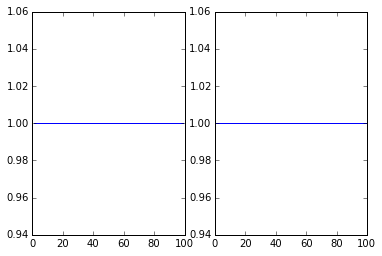

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
print(a.shape, gamma.shape)
ax1.plot(gamma, a)
ax2.plot(gamma, c)
plt.show()

In [85]:
def residual_vec(p, args):
    """
    """
    gamma = args['gamma']
    beta = args['beta']
    e0 = args['e0']
    ea = args['ea']

    N = gamma.shape[0]

    return (e0 + ea*p)*np.sum(1/((p/beta)**(-1/gamma) + p)) - N*ea

In [86]:
N = 100
e0 = 1.0
ea = 1.0
gamma = np.arange(1, N + 1)
beta = 0.98
p0 = 1.0
args = {'gamma': gamma,
        'beta': beta,
        'e0': e0,
        'ea': ea}

t0 = time()
res1 = scipy.optimize.root(residual, p0, args=(args))
print(time() - t0)
print(res1.message)
t0 = time()
res2 = scipy.optimize.root(residual_vec, p0, args=(args))
print(res2.message)
print(time() - t0)

0.014126062393188477
The solution converged.
The solution converged.
0.000782012939453125
